order_id            object
order_date          object
customer_id         object
city                object
sales_channel       object
category            object
sub_category        object
quantity             int64
unit_price           int64
discount_pct         int64
gross_amount         int64
discount_amount    float64
net_amount         float64
payment_method      object
dtype: object
order_id           0
order_date         0
customer_id        0
city               0
sales_channel      0
category           0
sub_category       0
quantity           0
unit_price         0
discount_pct       0
gross_amount       0
discount_amount    0
net_amount         0
payment_method     0
dtype: int64
0
quantity: 0 invalid values
unit_price: 0 invalid values
discount_pct: 0 invalid values
gross_amount: 0 invalid values
discount_amount: 0 invalid values
net_amount: 0 invalid values
  order_date    month  order_value  discount_pct  discount_flag
0 2024-10-12  2024-10      16320.0             0      

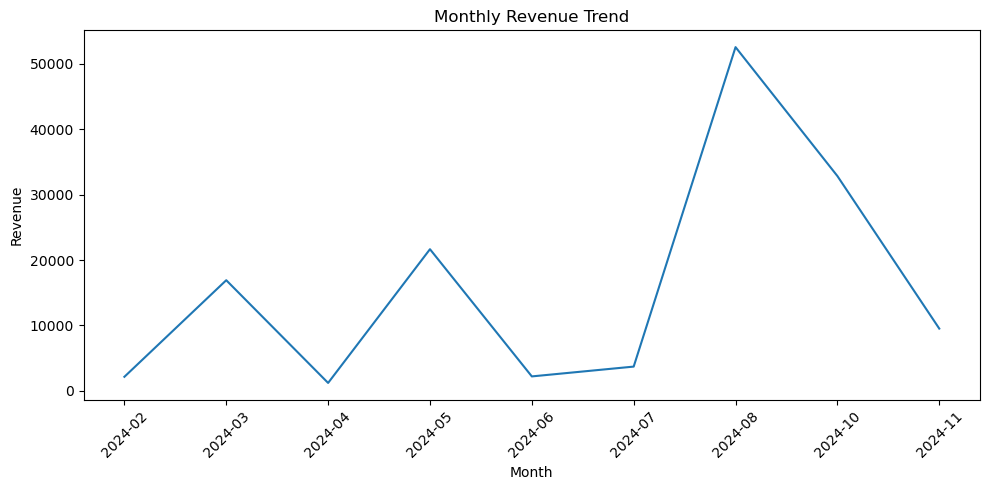

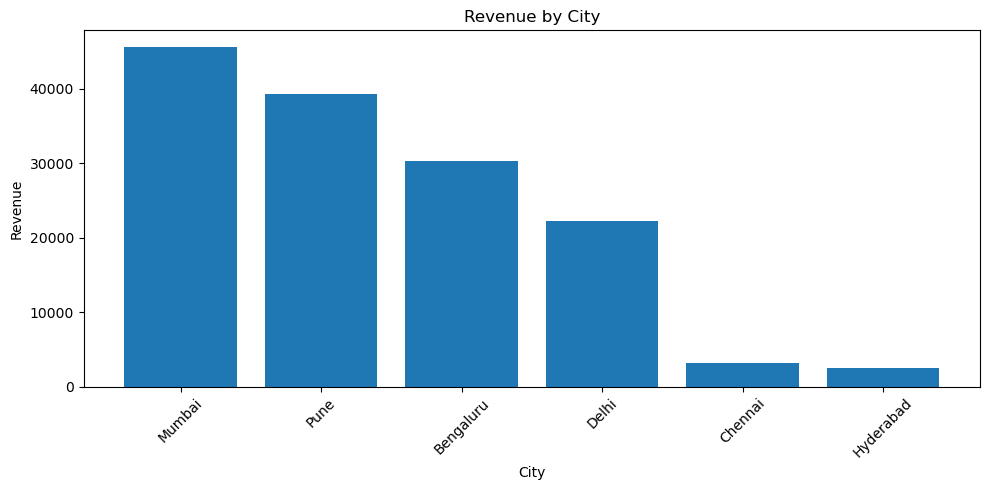

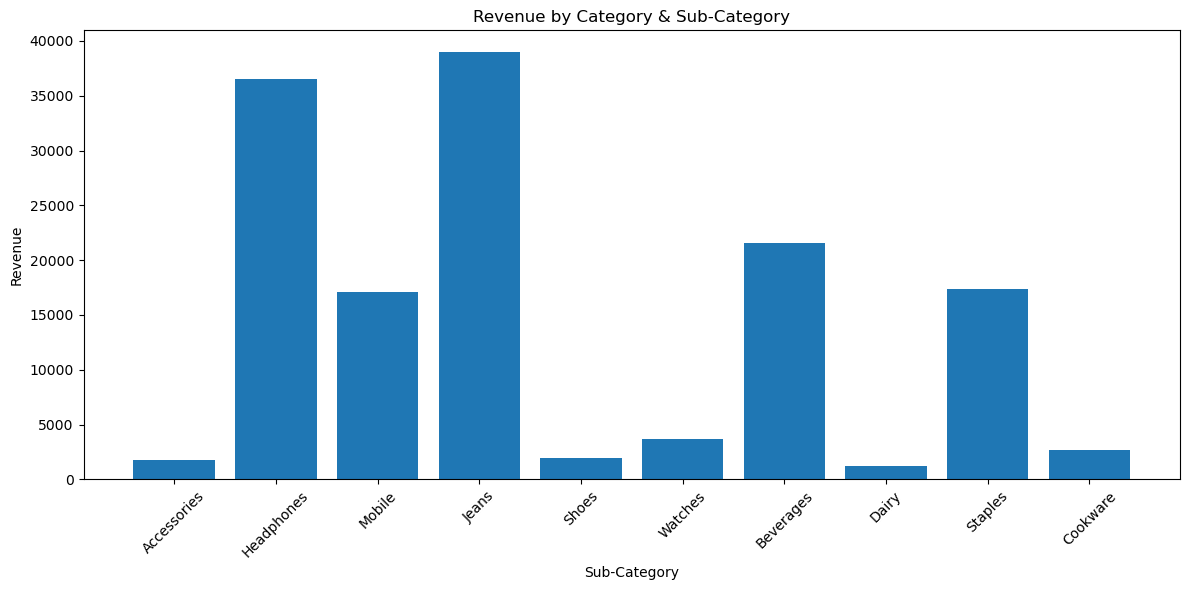

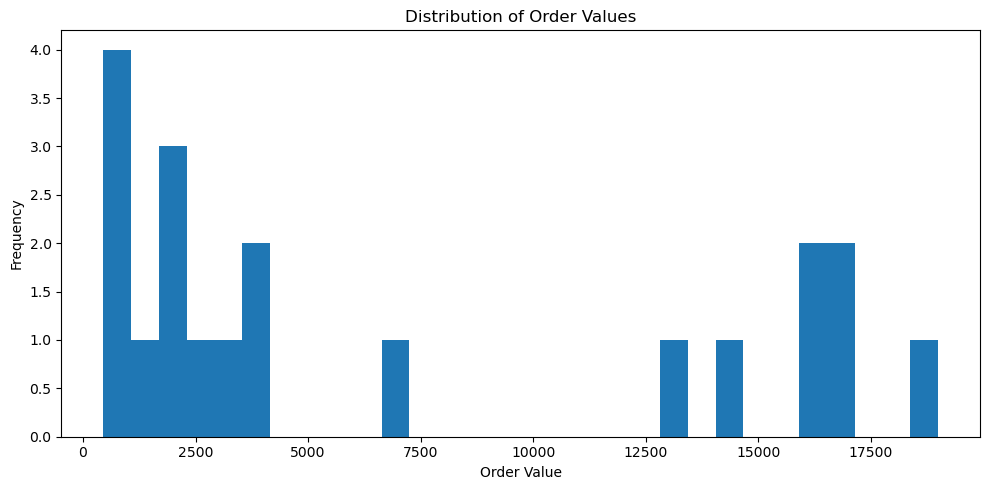

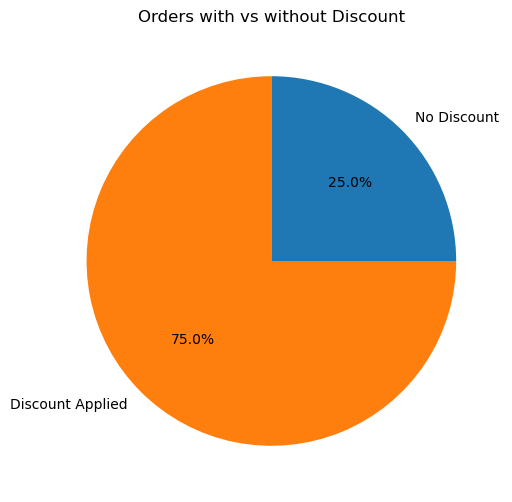

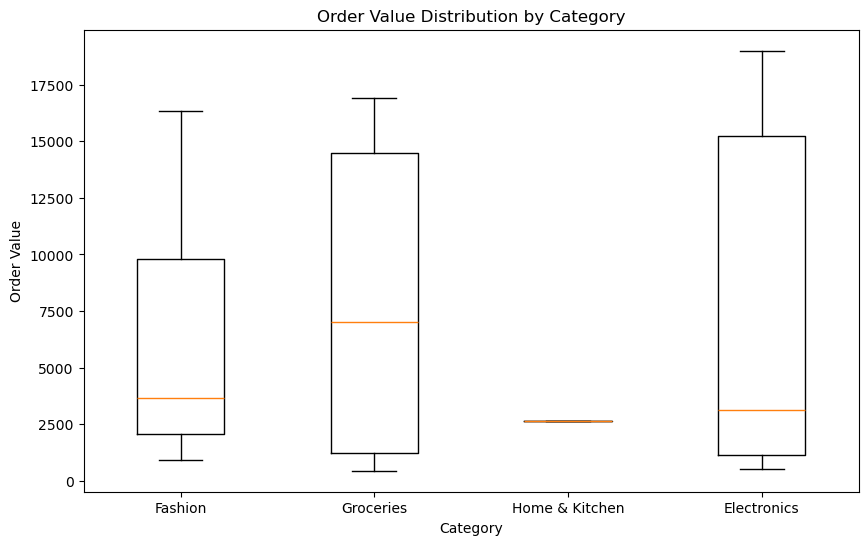

  customer_id  total_revenue  total_orders  avg_order_value  \
0     CUST003          448.8             1            448.8   
1     CUST004         1979.0             1           1979.0   
2     CUST006        16320.0             1          16320.0   
3     CUST007        18149.4             2           9074.7   
4     CUST008         1462.8             2            731.4   

   distinct_cities_visited  
0                        1  
1                        1  
2                        1  
3                        1  
4                        2  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1.LOAD DATA

df=pd.read_csv("C:\\Users\\bonal\\Desktop\\Retail_Analysis\\sample_full_project_data.csv")

#2.DATA QUALITY

#Check Data types
print(df.dtypes)
#Check Missing Values
print(df.isnull().sum())
#Check Duplicates
print(df.duplicated().sum())
#Ensure Numeric Columns are Correct
numeric_cols = [
    "quantity",
    "unit_price",
    "discount_pct",
    "gross_amount",
    "discount_amount",
    "net_amount"
]

for col in numeric_cols:
    # Non-numeric values will produce True
    invalid = pd.to_numeric(df[col], errors="coerce").isnull().sum()
    print(f"{col}: {invalid} invalid values")

#3.FEATURE CREATION

#Convert Order_date to Datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
#Create "Month" Feature (YYYY-MM)
df['month'] = df['order_date'].dt.to_period('M').astype(str)
#Create "order_value"
df['order_value'] = df['net_amount']
#Create "discount_flag"
df['discount_flag'] = df['discount_pct'].apply(lambda x: 1 if x > 0 else 0)

print(df[['order_date', 'month', 'order_value', 'discount_pct', 'discount_flag']].head())

#4.EDA

#Revenue by Month
monthly_revenue = df.groupby('month')['order_value'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['month'], monthly_revenue['order_value'])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

#Revenue by City
city_revenue = df.groupby('city')['order_value'].sum().reset_index().sort_values('order_value', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(city_revenue['city'], city_revenue['order_value'])
plt.xticks(rotation=45)
plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

#Revenue by Category & Sub-Category
cat_revenue = df.groupby(['category', 'sub_category'])['order_value'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(cat_revenue['sub_category'], cat_revenue['order_value'])
plt.xticks(rotation=45)
plt.title("Revenue by Category & Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

#Distribution of order values
plt.figure(figsize=(10,5))
plt.hist(df['order_value'], bins=30)
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#Orders with & without Discount
discount_counts = df['discount_flag'].value_counts()

labels = ['No Discount', 'Discount Applied']
sizes = [discount_counts[0], discount_counts[1]]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Orders with vs without Discount")
plt.show()

#Order value by Category
categories = df['category'].unique()

plt.figure(figsize=(10,6))
plt.boxplot([df[df['category']==c]['order_value'] for c in categories], labels=categories)
plt.title("Order Value Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Order Value")
plt.show()

#5.SIMPLE CUSTOMER INSIGHTS
#Customer-level Aggregations

customer_insights = df.groupby('customer_id').agg(
    total_revenue = ('net_amount', 'sum'),
    total_orders = ('order_id', 'count'),
    avg_order_value = ('net_amount', 'mean'),
    distinct_cities_visited = ('city', 'nunique')
).reset_index()

print(customer_insights.head())

#6.Export cleaned data to power bi
df.to_csv("sales_data_clean_for_powerbi.csv", index=False)


